In [ ]:
import numpy as np # numerical operations
import matplotlib.pyplot as plt # More traditional
import pandas as pd  # reading in data into tabular format
#from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns 

%matplotlib inline 

# Load Gender by Name Data Set
# Originally downloaded from: "https://archive.ics.uci.edu/ml/datasets/Gender+by+Name"
url = 'https://www.dropbox.com/s/towqgdf8yleg73q/name_gender_dataset.csv?dl=1'
NameData = pd.read_csv(url)
df = pd.DataFrame(NameData)


In [ ]:
# Check the data to see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


In [ ]:
df.isnull().sum()

Name      0
Gender    0
dtype: int64

In [ ]:
df.dtypes

Name            object
Gender          object
Count            int64
Probability    float64
dtype: object

In [ ]:
df.head(10)

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567
5,Mary,F,4169663,0.011411
6,David,M,3787547,0.010366
7,Joseph,M,2695970,0.007378
8,Richard,M,2638187,0.007220
9,Charles,M,2433540,0.006660


In [ ]:
df = df.drop(['Count','Probability'],axis=1)


In [ ]:
df.head(10)

,Name,Gender
0,James,M
1,John,M
2,Robert,M
3,Michael,M
4,William,M
5,Mary,F
6,David,M
7,Joseph,M
8,Richard,M
9,Charles,M


Convert the String and Char value in Name and Gender columns to integers with LabelEncoder:

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(df['Name'])

array([ 52308,  57879, 102035, ..., 133843, 133892, 133902])

In [ ]:
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
df.dtypes

Name      int64
Gender    int64
dtype: object

In [ ]:
df.head(10)

,Name,Gender
0,52308,1
1,57879,1
2,102035,1
3,84621,1
4,128418,1
5,81758,0
6,28803,1
7,58754,1
8,101320,1
9,22006,1


In [ ]:
df.describe()

,Name,Gender
count,147269.000000,147269.000000
mean,66792.183107,0.390578
std,38576.114809,0.487882
min,0.000000,0.000000
25%,33336.000000,0.000000
50%,66637.000000,0.000000
75%,100163.000000,1.000000
max,133909.000000,1.000000


In [ ]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=10,random_state=42)

In [ ]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

54856149162830.61

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[3.34473730e+04, 4.08511619e-01],
       [1.00249033e+05, 3.72583695e-01]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

5

In [ ]:
# Using the elbow method to find the optimal number of clusters
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    print("k value = ",i,"SSE = ",kmeans.inertia_)
    # inertia method returns wcss for that model
    sse.append(kmeans.inertia_)

k value 1 SSE 219151960458418.28
k value 2 SSE 54856352383350.81
k value 3 SSE 24351888380590.984
k value 4 SSE 13760831616056.258
k value 5 SSE 8782510560331.109
k value 6 SSE 6108783964296.628
k value 7 SSE 4495520753883.657
k value 8 SSE 3447327785721.728
k value 9 SSE 2720015555698.736
k value 10 SSE 2199842745089.486


In [ ]:

max(sse)
#print(sse)

219151960458418.28

In [ ]:
min(sse)

2199842745089.486

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


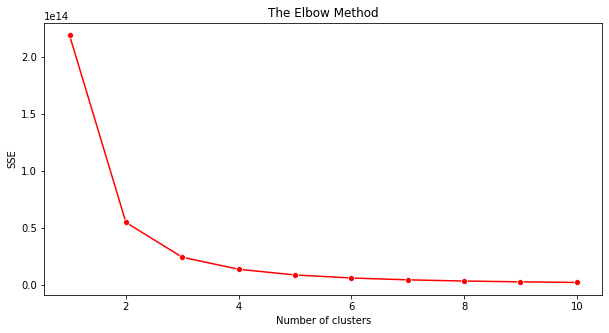

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), sse,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(df[y_kmeans == 4, 0], df[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of baby name')
plt.xlabel('Name')
plt.ylabel('Gender')
plt.legend()
plt.show()

TypeError: ignored

<Figure size 1080x504 with 0 Axes>